In [ ]:
# Link da aula
# https://www.youtube.com/watch?v=FEVV2YY60Yk&t=1262s

# https://ivanildo-batista13.medium.com/pycaret-para-s%C3%A9ries-temporais-8c258f53c830

# carregar modelo
# https://ivanildo-batista13.medium.com/pycaret-para-s%C3%A9ries-temporais-8c258f53c830

# https://towardsdatascience.com/time-series-forecasting-with-pycaret-regression-module-237b703a0c63 --> ainda não visto

In [ ]:
!pip install pycaret

In [ ]:
!pip install pycaret-ts-alpha

In [ ]:
!pip install jinja2

In [ ]:
!pip install markupsafe==2.0.1

In [ ]:
!pip install prophet

In [ ]:
!pip install tsfresh

In [ ]:
!pip install sktime[all_extras] #get_test_params

In [ ]:
import tsfresh # get_test_params

In [ ]:
import prophet

In [ ]:
import pycaret

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,6

In [ ]:
df = pd.read_excel('/content/DataFrame_Processos_Percentual_Base_Completa.xlsx')
df.Dtinicio = pd.to_datetime(df.DiaInicio)
df.set_index('DiaInicio', inplace=True)
df.head(3)

,DtHoraInicio,DtHoraFim,Processo,TempoMinutos,TempoMinutosInicioExecucao
DiaInicio,,,,,
2021-01-05,2021-01-05 05:21:00,2021-01-05 07:40:00,Rotina_01,139,321.0
2021-01-06,2021-01-06 04:13:00,2021-01-06 05:54:00,Rotina_01,101,253.0
2021-01-07,2021-01-07 03:30:00,2021-01-07 05:24:00,Rotina_01,114,210.0


In [ ]:
# Filtra somente pelo Processo 04 - caso de uso para avaliação em questão
# Foi o que a princípio apresentou lentidão ao rodar em concorrência com o Processo 01
df = df.loc[df['Processo']=='Rotina_04'] #--> este é o correto

#### apenas para testes - fazer com base menor
#df = df.loc[(df['Processo']=='Rotina_04') & (df['DtHoraInicio']>='2021-09-01')]
#### apenas para testes


# Cria Dataframe somente com as colunas que interessam
df = pd.DataFrame(df, columns = ['TempoMinutos'])
df.head(3)

,TempoMinutosInicioExecucao
DiaInicio,
2021-01-05,164.0
2021-01-06,136.0
2021-01-07,267.0


<AxesSubplot:xlabel='DiaInicio'>

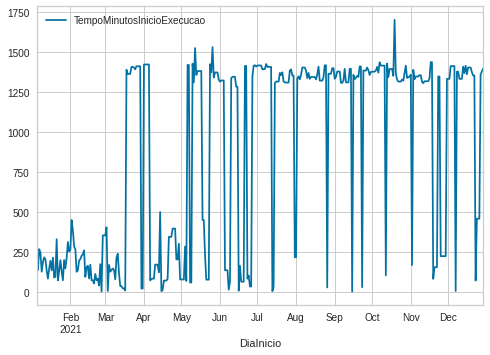

In [ ]:
df.plot(grid=True)

In [ ]:
# Configurando os dados
from pycaret.time_series import *

In [ ]:
# Define tamanho da base
tamanho_base = df.count() # 359 linhas

In [ ]:
# Define tamanho base Treino e Teste - usaremos inicialmente 2/3 para treinar e 1/3 para testar
train_size = int(tamanho_base * 2 / 3)
train_size

239

In [ ]:
# Define bases de treino
train_set = df[:train_size]
train_set.head(3)

,TempoMinutos
DiaInicio,
2021-01-05,226
2021-01-06,276
2021-01-07,404


In [ ]:
# Define bases de teste
test_set = df[train_size:]
test_set.head(3)

,TempoMinutos
DiaInicio,
2021-09-01,380
2021-09-02,402
2021-09-03,356


In [ ]:
# Base tem 359 linhas - 2/3 (239) para treino e 1/3 (120) para testes
setup(df, fh=120, fold=1, session_id=123)

,Description,Value
0,session_id,123
1,Target,TempoMinutosInicioExecucao
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Data shape,"(359, 1)"
5,Train data shape,"(239, 1)"
6,Test data shape,"(120, 1)"
7,Fold Generator,ExpandingWindowSplitter
8,Fold Number,1
9,Enforce Prediction Interval,False


In [ ]:
# Avaliação estatística
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Actual,Length,,359.0
1,Summary,Statistics,Actual,Mean,,869.495808
2,Summary,Statistics,Actual,Median,,1323.0
3,Summary,Statistics,Actual,Standard Deviation,,604.467297
4,Summary,Statistics,Actual,Variance,,365380.712703
5,Summary,Statistics,Actual,Kurtosis,,-1.794364
6,Summary,Statistics,Actual,Skewness,,-0.381103
7,Summary,Statistics,Actual,# Distinct Values,,207.0
8,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 24}",1496.380721
9,White Noise,Ljung-Box,Actual,Test Statictic,"{'alpha': 0.05, 'K': 48}",2234.574188


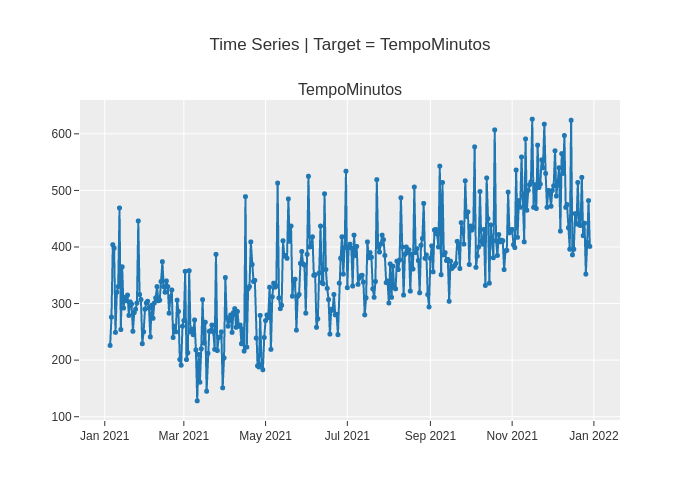

In [ ]:
plot_model(plot='ts')

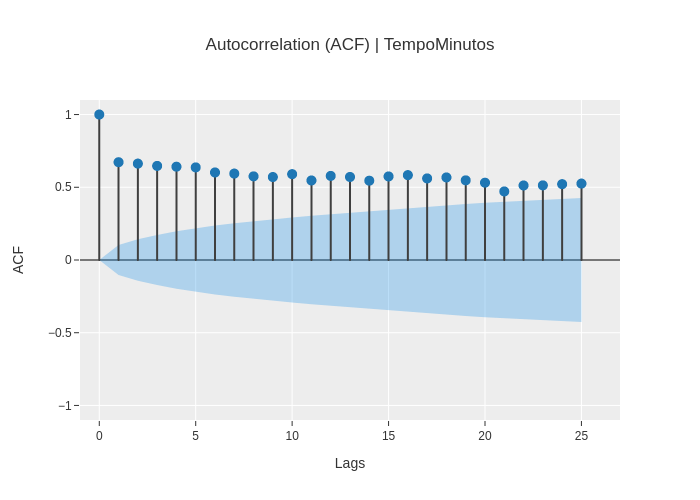

In [ ]:
plot_model(plot='acf')

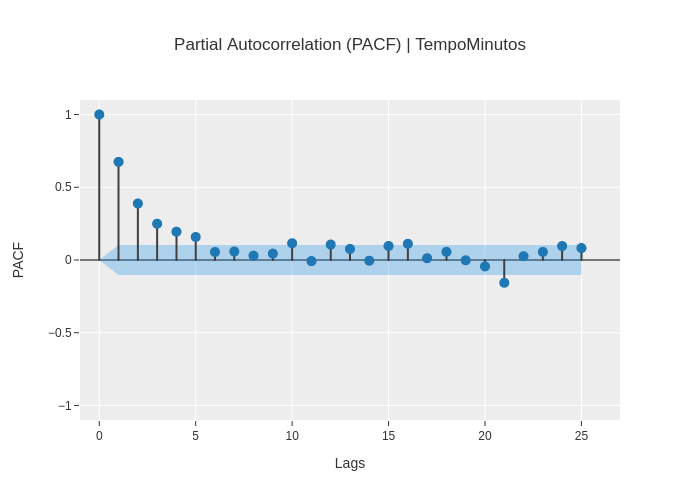

In [ ]:
plot_model(plot='pacf')

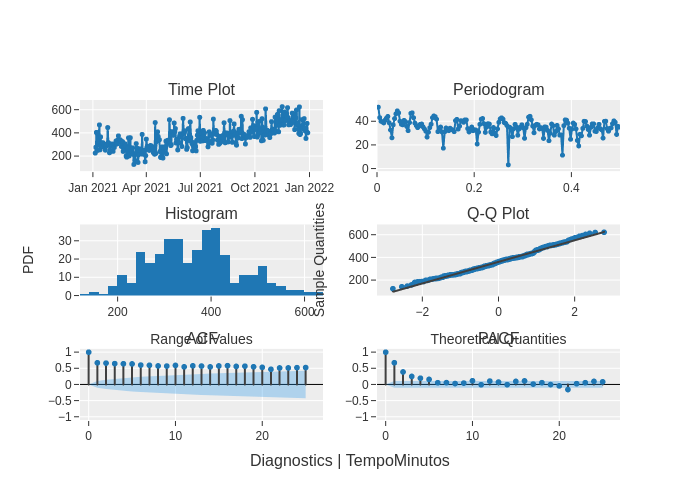

In [ ]:
plot_model(plot='diagnostics')

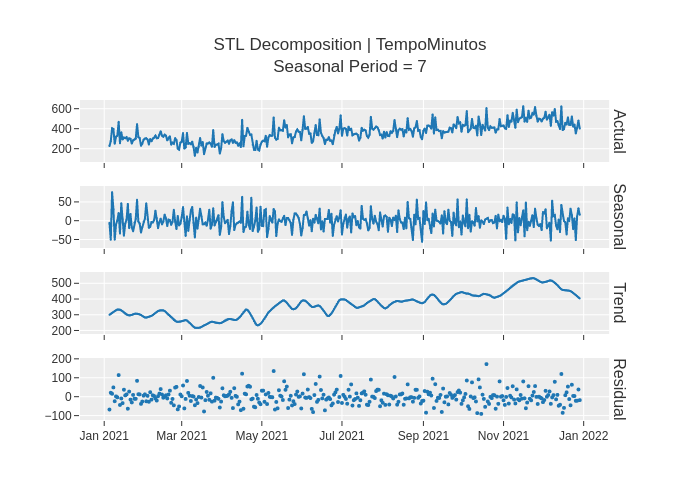

In [ ]:
plot_model(plot='decomp_stl')

In [ ]:
# Treinando o Modelo
best = compare_models(sort='RMSE')

,Model,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2,TT (Sec)
par_cds_dt,Passive Aggressive w/ Cond. Deseasonalize & De...,595.3586,615.2434,4.2661,0.8042,2.1595,1.2514,-0.2952,0.09
polytrend,Polynomial Trend Forecaster,611.4434,627.1874,4.8506,0.8099,2.2178,1.2757,-0.346,0.06
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,620.5396,644.584,4.2659,0.8298,2.2508,1.3111,-0.4217,0.55
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasona...,632.0308,659.9491,4.1158,0.8518,2.2925,1.3423,-0.4903,0.10
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,643.2018,670.0422,3.9989,0.8671,2.333,1.3629,-0.5362,12.48
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseaso...,641.9158,672.4378,4.0282,0.8709,2.3283,1.3678,-0.5472,0.10
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,649.8006,677.2321,3.9347,0.8778,2.3569,1.3775,-0.5693,12.57
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detren...,647.0781,678.9364,3.9781,0.8811,2.3471,1.381,-0.5772,0.10
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,647.9174,680.028,3.9699,0.8823,2.3501,1.3832,-0.5823,0.11
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,647.9178,680.0285,3.9699,0.8823,2.3501,1.3832,-0.5823,0.16


In [ ]:
# Escolha do compare_models()
best

NaiveForecaster(strategy='mean')

In [ ]:
# Parâmetros
best.get_params()

{'sp': 1, 'strategy': 'mean', 'window_length': None}

In [ ]:
# Parâmetros
#best.get_fitted_params()
best.get_fitted_params

<bound method BaseForecaster.get_fitted_params of NaiveForecaster(strategy='mean')>

In [ ]:
#######################################
# https://towardsdatascience.com/understanding-arima-models-using-pycarets-time-series-module-part-1-692e10ca02f2

In [ ]:
# Teste 1
model1 = create_model(
    "auto_arima",
    order=(2, 1, 2),
    seasonal_order=(0, 0, 0, 7) # não adianta passar os parâmetros, é feito com base no criado por 'compare_models'
)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-05-03,84.1082,126.5066,0.2438,0.2673,1.2757,1.3779,-0.1361
Mean,NaT,84.1082,126.5066,0.2438,0.2673,1.2757,1.3779,-0.1361
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [ ]:
# Teste 2
model1 = create_model(
    "auto_arima"
)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-05-03,852.6661,928.1921,2.5072,1.2223,3.0928,1.888,-1.9479
Mean,NaT,852.6661,928.1921,2.5072,1.2223,3.0928,1.888,-1.9479
SD,NaT,0.0000,0.0000,0.0000,0.0000,0.0000,0.000,0.0000


In [ ]:
model1.get_fitted_params()

{'aic': 3526.402628177645,
 'aicc': 3526.4195773301876,
 'bic': 3529.8748988513166,
 'hqic': 3527.8020154662745,
 'order': (0, 1, 0),
 'seasonal_order': (0, 0, 0, 7),
 'sigma2': 158162.6789155563}

In [ ]:
final_model1 = finalize_model(model1)
final_model1

AutoARIMA(random_state=123, sp=7, suppress_warnings=True)

In [ ]:
final_model1.

In [ ]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1762.201
Date:                Thu, 04 Aug 2022   AIC                           3526.403
Time:                        20:30:20   BIC                           3529.875
Sample:                             0   HQIC                          3527.802
                                - 239                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.582e+05   6633.648     23.842      0.000    1.45e+05    1.71e+05
===================================================================================
Ljung-Box (L1) (Q):                   1.75   Jarque-Bera (JB):               568.91
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               6.25   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model1.predict_residuals()

2021-01-05          NaN
2021-01-06   -38.225883
2021-01-07    -3.027555
2021-01-08    -6.117958
2021-01-09    21.569188
                ...    
2021-08-27    -9.088666
2021-08-28   -11.318235
2021-08-29     1.559819
2021-08-30     0.279193
2021-08-31    -3.559588
Freq: D, Length: 239, dtype: float64

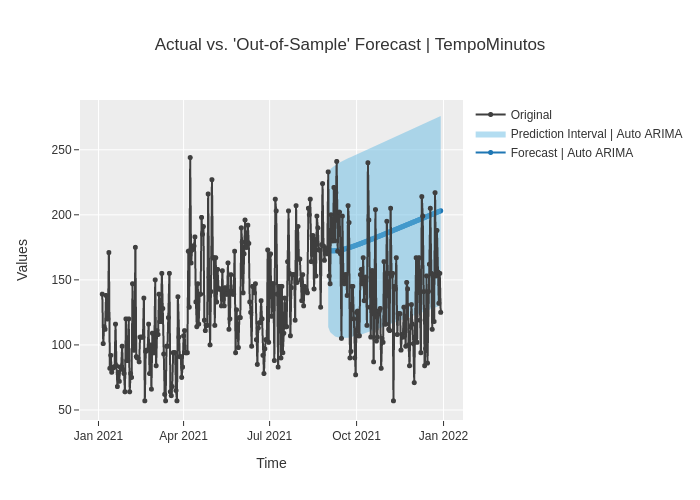

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(model1)

In [ ]:
####################################

In [ ]:
# Caso queira avaliar apenas um modelo
prophet = create_model('prophet')
print(prophet)

,cutoff,MAE,RMSE,MAPE,SMAPE,MASE,RMSSE,R2
0,2021-05-03,142.2507,156.521,0.373,0.4729,2.3057,1.8867,-5.72
Mean,NaT,142.2507,156.521,0.373,0.4729,2.3057,1.8867,-5.72
SD,NaT,0.0000,0.000,0.000,0.0000,0.0000,0.0000,0.00


ProphetPeriodPatched()


In [ ]:
prophet.get_fitted_params()

{'beta': array([ 0.00169826,  0.00080936,  0.0168298 , -0.00488196,  0.00638798,
        -0.0102293 ]),
 'delta': array([-2.31209e-09,  7.98170e-09,  4.71728e-08,  6.28804e-08,
         5.78391e-09, -2.63020e-09,  4.11514e-03,  1.39528e-03,
         6.16904e-02,  9.20227e-02,  9.64654e-02,  7.66080e-02,
         4.53206e-02,  1.43032e-03, -3.10115e-09,  1.80906e-08,
        -5.00397e-10, -3.05684e-10,  1.43933e-09, -1.08847e-07,
        -1.93119e-09, -2.41553e-09,  1.15347e-09,  7.64914e-11,
        -1.50869e-08]),
 'k': -0.0470509,
 'm': 0.543785,
 'sigma_obs': 0.115239}

In [ ]:
best

NaiveForecaster(strategy='mean')

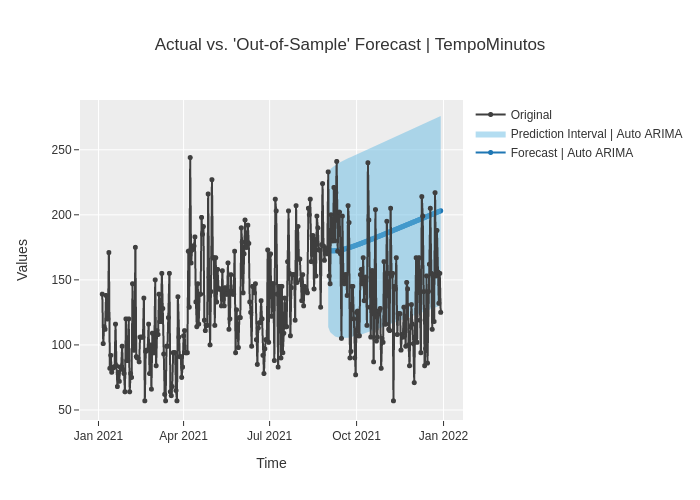

INFO:logs:Visual Rendered Successfully


In [ ]:
plot_model(model1, plot = 'forecast')

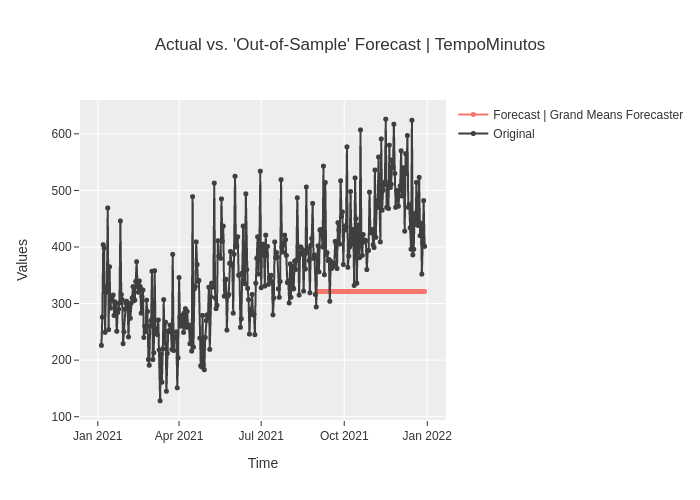

INFO:logs:Visual Rendered Successfully


In [ ]:
# Exponential Smoothing
plot_model(best, plot = 'forecast')

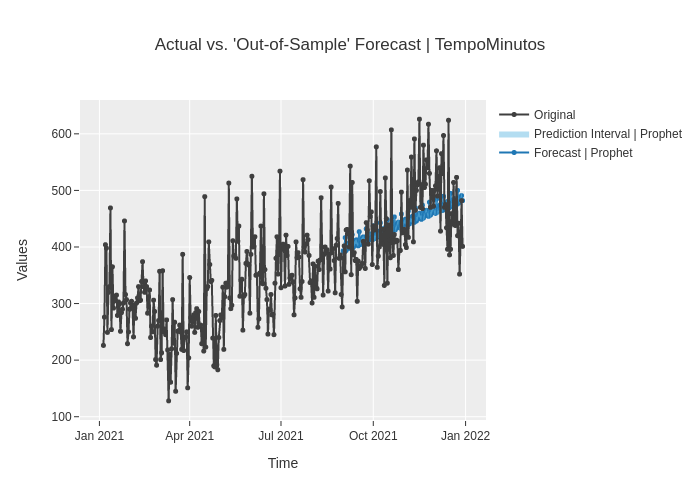

INFO:logs:Visual Rendered Successfully


In [ ]:
# Prophet
plot_model(prophet, plot = 'forecast')

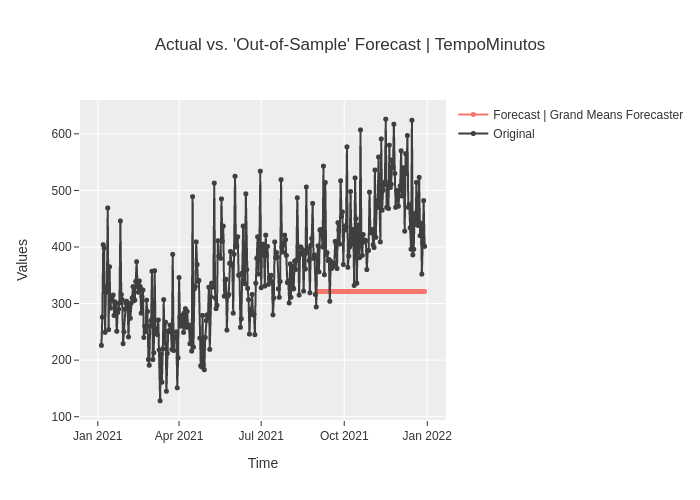

INFO:logs:Visual Rendered Successfully


In [ ]:
# Prevendo além dos dados - Exponential Smoothing
plot_model(best, plot='forecast', data_kwargs = {'fh' : 120}) # prevendo 120 dias

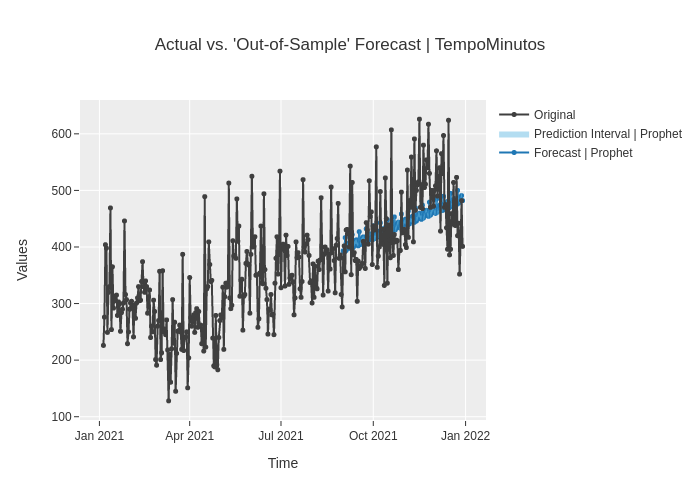

INFO:logs:Visual Rendered Successfully


In [ ]:
# Prevendo além dos dados - Prophet
plot_model(prophet, plot='forecast', data_kwargs = {'fh' : 120})

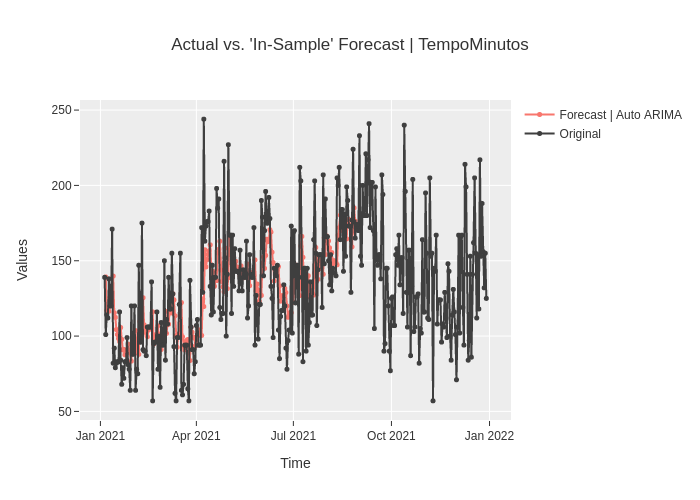

INFO:logs:Visual Rendered Successfully


In [ ]:
# Previsão na mesma série - Exponential Smoothing
plot_model(model1, plot='insample')

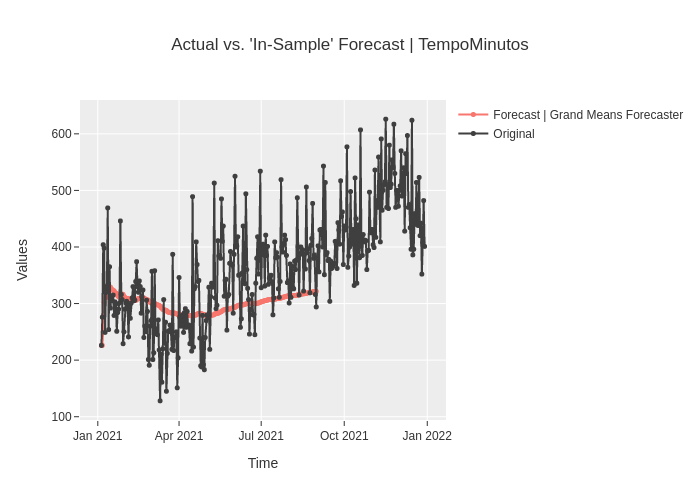

INFO:logs:Visual Rendered Successfully


In [ ]:
# Previsão na mesma série - Exponential Smoothing
plot_model(best, plot='insample')

In [ ]:
# Previsão na mesma série - Prophet
plot_model(prophet, plot='insample')

ValueError: ignored

In [ ]:
# Modelo final - Prophet
final_prophet = finalize_model(prophet)

In [ ]:
# Modelo final - Exponential Smoothing
final_best = finalize_model(best)

In [ ]:
# Gerando valores preditivos - Exponential Smoothing
predict_model(final_best, fh = 90)

,y_pred
2021-12-30,364.7855
2021-12-31,364.7855
2022-01-01,364.7855
2022-01-02,364.7855
2022-01-03,364.7855
...,...
2022-03-25,364.7855
2022-03-26,364.7855
2022-03-27,364.7855
2022-03-28,364.7855


In [ ]:
# Gerando valores preditivos - Prophet
predict_model(final_prophet, fh = 90)

,y_pred
2021-12-30,491.8177
2021-12-31,509.2590
2022-01-01,491.8609
2022-01-02,490.8611
2022-01-03,504.4328
...,...
2022-03-25,573.9057
2022-03-26,556.5076
2022-03-27,555.5078
2022-03-28,569.0795


In [ ]:
final_best


NaiveForecaster(strategy='mean')

In [ ]:
final_prophet

ProphetPeriodPatched()

In [ ]:
# Salvando o modelo
save_model(final_best, 'my_best_model')

Transformation Pipeline and Model Successfully Saved


(AutoARIMA(random_state=123, sp=7, suppress_warnings=True),
 'my_best_model.pkl')

In [ ]:
save_model(final_prophet, 'my_best_model_Prophet')

Transformation Pipeline and Model Successfully Saved


(ProphetPeriodPatched(), 'my_best_model_Prophet.pkl')